In [1]:
# http://www.spectralpython.net/graphics.html
import pysptools.abundance_maps as amp
import matplotlib.pyplot as plt
import spectral.io.envi as envi
import pysptools.util as util
import pysptools.eea as eea
from spectral import imshow
from pathlib import Path
import numpy as np
import os

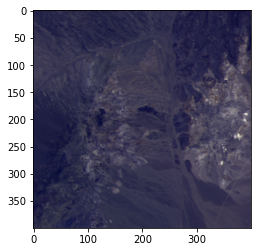

In [2]:
result_path = r"C:\Users\nicom\Desktop\MAESTRIA\Maestria_semestre_2\Remote_sensing\Actividad 3\results"
class_ref = envi.open(r'C:\Users\nicom\Downloads\OneDrive_1_15-6-2021\classmapA.hdr')
data_cuprite95, header_cuprite95 = util.load_ENVI_file(r'Cuprite95\cuprite95bs_ss.hdr')
data_cuprite95 = np.fliplr(data_cuprite95)
cuprite95 = envi.open(r'Cuprite95\cuprite95bs_ss.hdr')

end_members = 10
view = imshow(cuprite95, (29, 19, 9))

ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 255.0]
    G: [0.0, 255.0]
    B: [0.0, 255.0]

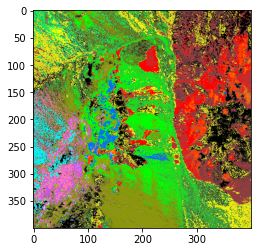

In [3]:
imshow(class_ref)

In [4]:
print('Endmembers extraction with NFINDR')
nfindr = eea.NFINDR()
U = nfindr.extract(data_cuprite95, end_members, maxit=5, normalize=True, ATGP_init=True)
nfindr.plot(result_path, axes=header_cuprite95)

Endmembers extraction with NFINDR


In [10]:
print('Abundance maps generation with NNLS')
nnls = amp.NNLS()
amaps = nnls.map(data_cuprite95, U, normalize=True)
nnls.plot(result_path, colorMap='jet', suffix='nfindr')

Abundance maps generation with NNLS


<Figure size 432x288 with 0 Axes>

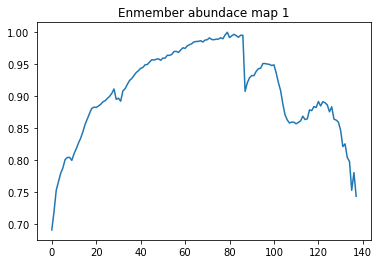

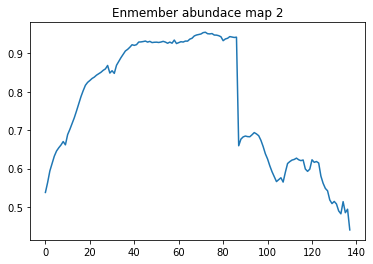

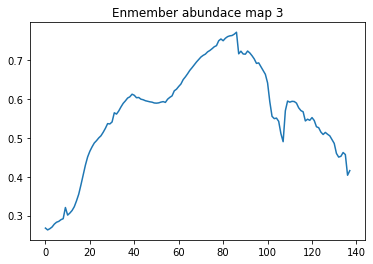

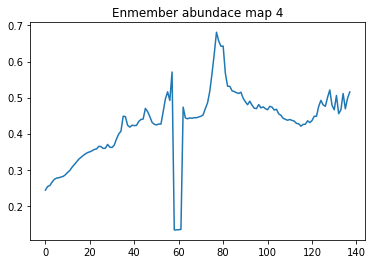

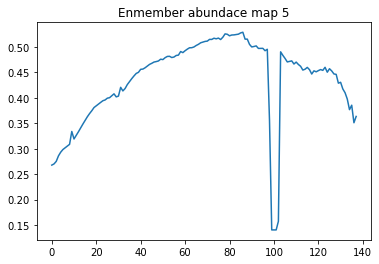

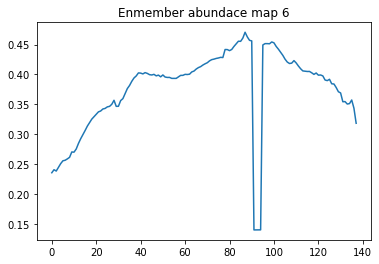

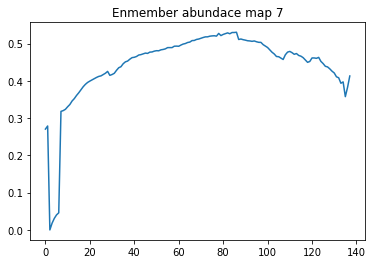

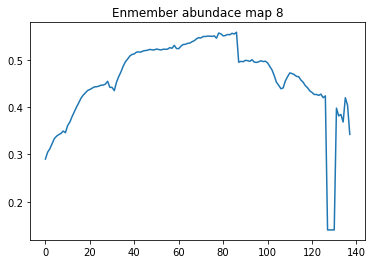

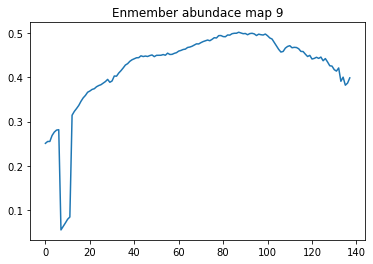

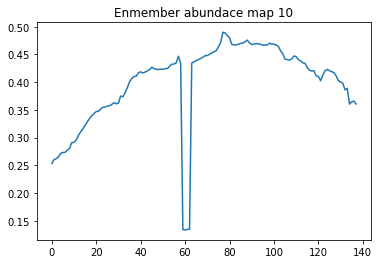

In [11]:
for n, i in enumerate(U):
    plt.plot(range(len(i)),i)
    plt.title(f"Enmember abundace map {n + 1}")
    plt.savefig(f"{result_path}/signature{n + 1}.png")
    plt.show()

In [7]:
print('Endmembers extraction with ATGP')
atpg = eea.ATGP()
U = atpg.extract(data_cuprite95, end_members, normalize=True)
atpg.plot(result_path, axes=header_cuprite95)

Endmembers extraction with ATGP


In [8]:
print('Abundance maps generation with NNLS')
nnls = amp.NNLS()
amaps = nnls.map(data_cuprite95, U, normalize=True)
nnls.plot(result_path, colorMap='jet', suffix='atpg')

Abundance maps generation with NNLS


<Figure size 432x288 with 0 Axes>